# <font color='red'>5.1 Importing libraries</font>

In [1]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os
import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly
from matplotlib_scalebar.scalebar import ScaleBar
from biosppy.signals import tools
from biosppy.stats import pearson_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import seaborn as sns

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

# Feature Extraction (.py files by Teresa Parreira)
# from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
# from CytoSkeletonRegionPropsInt import RegionPropsInt
# from FreqAnalysis import FreqAnalysis
# from GLCM import GLCM

# Graph
import sknw
import networkx as nx
from scipy.signal import argrelextrema

# 
from skan import Skeleton, summarize,draw
from skan.csr import skeleton_to_csgraph, sholl_analysis,make_degree_image
#from analyze_cell import analyze_cell
#from line_segment_features import line_segment_features
import scipy as sp
import scipy.sparse
from matplotlib.patches import Circle
from ImageFeatures import ImageFeatures
from Functions import label_image, FeaturesFromCentroid, cv2toski,pylsdtoski,init_import,polar_to_cartesian, truncate_colormap, plot_hist, plot_pie, remove_not1D, quantitative_analysis,hist_bin,hist_lim,create_separate_DFs,branch,graphAnalysis,sholl
from fractal_dimension import fractal_dimension
from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC

print('📚')

C:\Users\diogo\AppData\Roaming\Python\Python37\site-packages\nose\importer.py:12: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import find_module, load_module, acquire_lock, release_lock


📚


# <font color='red'>5.2 Import and Create DataFrame with available images</font>

In [51]:
global OriginalDF,DeconvDF,DenoisedDF,NoiseDF,NucleiDeconvDF,SyntheticDF
OriginalDF,DeconvDF,DenoisedDF,NoiseDF,NucleiDeconvDF,SyntheticDF = init_import()  # Import Images, add to DataFrame
Centroids = pickle.load(open('Centroids.p', 'rb'))
TextureDF = pd.read_pickle(os.getcwd() + "\\TextureDF_sub.pkl")   
dir_masks = os.getcwd() + str("//nuclei_masks")
ROIs      = pickle.load(open('ROIs.p', 'rb'))

print('🌠')

🌠


In [3]:
#OriginalDF
#DeconvDF
#DenoisedDF
#NoiseDF
#NucleiDeconvDF
#Centroids
#TextureDF
ROIs

,Name,Index,Label,Skeleton
11,10_6IF_CHO_L_w3_(DAPI+Alexa 568)_PS.tif,11,WT,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
16,15_IF6_CHO_L-W1_(DAPI+Alexa 568)_PS.tif,16,Mock,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
18,17_IF6_CHO_L-W1_(DAPI+Alexa 568)_PS.tif,18,Mock,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
20,19_IF6_CHO_L-W1_(DAPI+Alexa 568)_PS.tif,20,Mock,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
34,33_IF6_CHO_L-W5_(DAPI+Alexa 568)_PS.tif,34,No transfection,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
36,35_IF6_CHO_L-W5_(DAPI+Alexa 568)_PS.tif,36,No transfection,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
38,37_IF6_CHO_L-W5_(DAPI+Alexa 568)_PS.tif,38,No transfection,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
40,39_IF6_CHO_L-W6_(DAPI+Alexa 568)_PS.tif,40,Del38_46,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
42,41_IF6_CHO_L-W6_(DAPI+Alexa 568)_PS.tif,42,Del38_46,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
44,43_IF6_CHO_L-W6_(DAPI+Alexa 568)_PS.tif,44,Del38_46,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# <font color='red'>5.3 Generalized Feature Analysis using cell ROIs as input</font>


In [4]:

def plot_hist(ImageLinesDF,feat,bins):
    cmap = pltc.Reds
    global new_cmap
    new_cmap = truncate_colormap(cmap, 0.3, 1, 300)
    
    global data
    data = ImageLinesDF.tail(1)
    global histog,bin_edges
    
#     if feat == 'Distances to Centroid':
#         bins = np.arange(0, 280 + 5, 5)
#     if feat == 'Triangle Areas':
#         bins = np.arange(0, 4600 + 5, 5)
#     if feat == 'Line Lengths':
#         # max(data[feat][data.index[0]])
#         bins = np.arange(0, 220 + 5, 5)
#     if feat == 'Theta':
#         bins = np.arange
#     if feat == 'Angle Difference':
#         bins = np.arange
    
    histo = np.histogram(data[feat][data.index[0]],bins=bins[0])
    
    # AX1
    plt.figure()
    ax1 = plt.subplot(1,1,1)
    ax1.set_ylabel('Absolute Frequency')
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.tick_params(axis='y', colors=pltc.Reds_r(0))

    
    global colours
    #colours = pltc.Reds(plt.Normalize(0, max(histog[0]))(histog[0]),alpha=0.7)
    #colours = new_cmap(plt.Normalize(0, max(histo[0]))(histo[0]),alpha=0.7)

    #ax1.bar(histog[1][:-1],histog[0],color=colours,zorder=5)
    histog, bin_edges, patches = ax1.hist(data[feat][data.index[0]], bins=bins[0],color='k',alpha=0.7,edgecolor = "white")
    #ax1.color = new_cmap(plt.Normalize(0, max(histog))(histog),alpha=0.7)
    for c, p in zip(histog, patches):
        plt.setp(p, 'facecolor', new_cmap(plt.Normalize(0, max(histog))(c), alpha = 0.7))
    
    # AX2
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Relative Frequency')  
    _ = ax2.hist(data[feat][data.index[0]], bins=bins[0], density=True,color='k',alpha=0.7,fill=False,histtype='step',ls='dashed')
    #ax2.plot(histog[1][:-1],(histog[0]/np.trapz(histog[0],x=histog[1][:-1])),'--',alpha=0,zorder=1)
    plt.grid(alpha=0.3)
    
    if feat == 'Angles':
        ax1.set_xlabel('Degrees (º)')
        ax1.set_title('Angle between Centroid and Line Segment',fontsize=12)
        ax1.set_xticks(bin_edges)
    if feat == 'Distances to Centroid':
        ax1.set_xlabel('Pixels')
        ax1.set_title('Distance between Centroid and Line Segment',fontsize=12)
        ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        #ax1.set_xticks(np.linspace(0,130,10,endpoint=True,dtype=int))
        
    if feat == 'Triangle Areas':
        ax1.set_xlabel('Pixels')
        ax1.set_title('Triangle Areas between Centroid and Line Segment',fontsize=12)
        #ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        
    if feat == 'Line Lengths':
        ax1.set_xlabel('Pixels')
        ax1.set_title('Line Length',fontsize=12)
        ax1.set_xticks(np.linspace(0,bin_edges[-1],10,endpoint=True,dtype=int))
        #ax1.set_xticks(np.linspace(0,170,10,endpoint=True,dtype=int))
        
    if feat == 'Theta':
        ax1.set_xlabel('Degrees (º)')
        ax1.set_title('Line Segment Angle',fontsize=12)
        ax1.set_xticks(bin_edges)
        
    if feat == 'Angle Difference':
        ax1.set_xlabel('Degrees (º)')
        ax1.set_title('Angle Difference (º)',fontsize=12)
        ax1.set_xticks(bin_edges)
    
    ax1.set_xticks(hist_bin(feat)[1])
    ax1.set_xticklabels(hist_bin(feat)[1],rotation=45, ha='right', rotation_mode='anchor')
            
    #plt.savefig(".//CellVSCellAnalysis//" + str(feat) + ".png",format='png',transparent=True,bbox_inches='tight')
    plt.show()
    
# Quantitative Analysis
def quantitative_analysis(ImageLinesDF):
    feats = list(ImageLinesDF.columns[3:])
    cmap = pltc.Reds
    global new_cmap
    new_cmap = truncate_colormap(cmap, 0.3, 1, 300)
    
    #histog = np.histogram(np.array(feat_concat[~np.isnan(feat_concat)]),bins=30)
    # plt.plot(histog[1][:-1],histog[0]/np.sum(histog[0]),color=colors[labels.index(label)],linewidth=4,label = label,alpha=0.7)
    flag = False
    global feat
    for feat in feats:

        if feat == 'Angles':
            #histog = np.histogram(ImageLinesDF[feat][ImageLinesDF[feat].index[0]],bins=180)
            #plot_hist(feat=feat,bins=np.linspace(0,90,91))
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))

        elif feat == 'Distances to Centroid':
            #histog = np.histogram(ImageLinesDF[feat][ImageLinesDF[feat].index[0]],bins=30)
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
            #aux = []
            #for i in range(len(histog[1])-1):
            #    aux += [np.pi*(histog[1][i+1])**2 - np.pi*(histog[1][i])**2]
            #ax2.plot(histog[1][:-1],(histog[0]/np.trapz(histog[0],x=histog[1][:-1]))/aux,'--',label='uga',alpha=0)
 
        elif feat == 'Triangle Areas':
            #histog = np.histogram(ImageLinesDF[feat][ImageLinesDF[feat].index[0]],bins=30)
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
        
        elif feat == 'Line Lengths':
            #histog = np.histogram(ImageLinesDF[feat][ImageLinesDF[feat].index[0]],bins=30)
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
            
        elif feat == 'Theta':
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
            
        elif feat == 'Angle Difference':
            plot_hist(ImageLinesDF=ImageLinesDF,feat=feat,bins=hist_bin(feat))
            
        elif feat == 'Number of Lines':
            plot_pie(ImageLinesDF=ImageLinesDF,feat=feat,Max=400)
            #flag = True
            
        else:
        #    #print("Fractal Dimension: " + str(ImageLinesDF[feat][ImageLinesDF[feat].index[0]]))
            print(str(feat) + ": " + str(ImageLinesDF.tail(1)[feat][ImageLinesDF.tail(1).index[0]]))
    
    global comb
    comb = combinations(range(len(feats[:6])), 2)
    data = ImageLinesDF.tail(1)
    for f in list(comb):
        fig, ax = plt.subplots()
        f1 = feats[f[0]]
        f2 = feats[f[1]]
        if f1 == 'Angles' or f1 == 'Theta' or f1 == 'Angle Difference':
            bin1 = np.linspace(0,90,10)
        else:
            bin1 = 15
        if f2 == 'Angles' or f2 == 'Theta' or f2 == 'Angle Difference':
            bin2 = np.linspace(0,90,10)
        else:
            bin2 = 15
        
        #plt.figure(figsize=(15,15))
        hi, xedges, yedges, image = plt.hist2d(data[feats[f[0]]][data.index[0]],data[feats[f[1]]][data.index[0]],bins=[bin1,bin2],cmap=cmap,alpha=0.7)   
        ax.set_xticks(xedges)
        ax.set_yticks(np.linspace(0,yedges[-1],10,endpoint=True,dtype=int))
        ax.set_facecolor(cmap(0))
        plt.xlabel(feats[f[0]])
        plt.ylabel(feats[f[1]])
        #plt.title('Line Segment Angles vs. Distances to Centroid')
        cbar = fig.colorbar(image, ax=ax)
        cbar.set_label("Absolute Frequency")
        plt.show()
        
#     # HEATMAP 1
#     fig, ax = plt.subplots()
#     data = ImageLinesDF.tail(1)
#     hi, xedges, yedges, image = plt.hist2d(data['Angles'][data.index[0]],data['Distances to Centroid'][data.index[0]],bins=[np.linspace(0,90,10), np.arange(0, 280 + 5, 5)],cmap=cmap,alpha=0.7)   
#     ax.set_facecolor(cmap(0))
#     plt.xlabel('Angle (º)')
#     plt.ylabel('Distance to Centroid (pixels)')
#     plt.title('Line Segment Angles vs. Distances to Centroid')
#     cbar = fig.colorbar(image, ax=ax)
#     cbar.set_label("Absolute Frequency")
#     plt.show()
    
#     # HEATMAP 2
#     fig, ax = plt.subplots()
#     data = ImageLinesDF.tail(1)
#     hi, xedges, yedges, image = plt.hist2d(data['Line Lengths'][data.index[0]],data['Distances to Centroid'][data.index[0]],bins=[30,30],cmap=cmap,alpha=0.7)   
#     plt.xlabel('Line Lengths (pixels)')
#     plt.ylabel('Distance to Centroid (pixels)')
#     plt.title('Line Segment Lengths vs. Distances to Centroid')
#     cbar = fig.colorbar(image, ax=ax)
#     cbar.set_label("Absolute Frequency")
#     plt.show()

def plot_pie(ImageLinesDF,feat,Max):
    cmap = pltc.Reds
    global new_cmap
    new_cmap = truncate_colormap(cmap, 0.3, 1, 300)
    
    global data
    data = ImageLinesDF.tail(1)
    
    # Pie chart
    labels = [feat, '-']
    if feat == 'Number of Lines':
        sizes = [data[feat][data.index[0]], Max]
        
    colors = [new_cmap(plt.Normalize(0, Max)(data[feat][data.index[0]]), alpha = 0.7),'w']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=[sizes[0],'-'], startangle=90)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white',ec='black')
    plt.gcf().gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    




print('plot_hist, quantitative_analysis, plot_pie (useless)')

plot_hist, quantitative_analysis, plot_pie (useless)


In [ ]:
def analyze_cell(text_img,mask,hough_params,centroids,OriginalDF,DeconvDF,NucleiDeconvDF,algorithm,plot):
    # INPUTS:
    # text_img                             = [skeleton, index,texture w/ intensity]
    # mask                                 = binary mask
    # hough_params                         = [thr, line length, line gap]
    # centroids                            = DataFrame with nuclei ID's, masks, centroids and contours from image
    # OriginalDF, DeconvDF, NucleiDeconvDF = Datasets
    # plot                                 = True/False
    
    global orig_cysk
    tmp        = copy.deepcopy(OriginalDF['Image'][text_img[1]])
    tmp[:,:,0] = 0
    orig_cysk  = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)
    
    global patch_aux,centroid,cr,patch_n,centroid
    
    
    # Texture patch for Hough Analysis
    global x_,y_,patch,aux_
    aux_    = mask * (text_img[0] * 1)
    x_,y_   = np.where((mask*1) != 0)
    patch   = aux_[min(x_):max(x_),min(y_):max(y_)]
    
    # Deconvoluted cytoskeleton patch 
    global x_f,y_f,patch_f,aux_f
    if algorithm == 'deconvoluted':
        aux_f   = mask * (DeconvDF['Image'][text_img[1]] / np.max(DeconvDF['Image'][text_img[1]]))
#     if algorithm == 'original':
#         aux_f   = mask * (orig_cysk / np.max(orig_cysk))
    x_f,y_f = np.where(aux_f != 0)
    patch_f = aux_f[min(x_f):max(x_f),min(y_f):max(y_f)]
    patch_f_norm = patch_f / np.max(aux_f)
    
    # GET and PLOT centroid
    global centroid_list,centroid
    centroid_list = []
    
    # GET: centroid inside ROI indexes
    for idx,row in centroids.iterrows():
        if (round(row['Centroid'][0]),round(row['Centroid'][1])) in list(zip(x_,y_)): 
            centroid_list += [idx]
    if centroid_list == []:  print("Error: No centroids within ROI"); return 0,0,0,0,0,0;
    if len(centroid_list) > 1: print("Warning: More than 1 centroid identified within ROI");
    
    # PLOT: first centroid identified and nucleus contour
    centroid = centroids.loc[centroid_list[0]]['Centroid']
    

     
        
    # PROCESSING: Line Segment Analysis
    global lines, median_points, features2D, features1D
    lines, median_points, centroid_list, centroid, cytocenter, radialSC_pos, features2D, features1D = line_segment_features(text_img[0],text_img[1],mask,patch,(x_,y_),centroids,plot)
    

    # Deconvoluted nuclei patch
    if algorithm == 'deconvoluted':
        aux_n    = mask * (NucleiDeconvDF['Image'][text_img[1]] / np.max(NucleiDeconvDF['Image'][text_img[1]]))

    try:
        contourr = centroids.loc[centroid_list[0]]['Contour'] 
        cr       = contourr.reshape((contourr.shape[0],contourr.shape[2]))
    except:
        contourr = centroids.loc[centroid_list[0]]['Contour'][0]
        cr       = contourr.reshape((contourr.shape[0],contourr.shape[2]))
    patch_n  = aux_n[min(cr[:,1]):max(cr[:,1]),min(cr[:,0]):max(cr[:,0])]
    patch_n_norm = patch_n / np.max(aux_n)

  
    # TEXTURAL ANALYSIS
    skel_w_int_full = aux_ * aux_f   
    skel_w_int = skel_w_int_full[min(x_):max(x_),min(y_):max(y_)]
    AAI = getAAI(skel_w_int)
    #AAI = 0
    
    # PROCESSING: **CYTOSKELETONS**
    b,d              = fractal_dimension_grayscale(patch)
    fractal_values_b = [round(b,3)]
    fractal_values_d = [round(d,3)]
    fdske            = [round(fractal_dimension(patch),3)]
    fd_deconv        = [round(fractal_dimension(patch_f_norm),3)]
        
    feats_all                    = ImageFeatures((patch_f_norm *255).astype(np.uint8))
    feats_labels_, feats_values_ = feats_all.print_features(print_values = False)
    feats_labels_, feats_values_ = remove_not1D(feats_labels_,feats_values_)
    feats_labels_                = ['DCF:' + ftf for ftf in feats_labels_]
 
    # PROCESSING: **NUCLEI**
    b_n,d_n = fractal_dimension_grayscale(patch_n_norm)
    fractal_values_n_b = [round(b_n)]
    fractal_values_n_d = [round(d_n)] 
    fd_nuc  = [fractal_dimension(patch_n_norm)]
    
    feats_all_n                      = ImageFeatures((patch_n_norm *255).astype(np.uint8))
    feats_labels_n_, feats_values_n_ = feats_all_n.print_features(print_values = False)
    feats_labels_n_, feats_values_n_ = remove_not1D(feats_labels_n_,feats_values_n_)
    feats_labels_n_                  = ['DNF:' + ftn for ftn in feats_labels_n_]
    
    # PROCESSING: Graph Analysis
    global int_ske, graph, graph_res, shollhist, cncd, pxlcount
    int_ske         = ((text_img[0] * 1) * aux_f) / np.max(aux_f) #1040x1388
    graph,graph_res,shollhist = graphAnalysis(int_ske,[x_,y_],[aux_n / np.max(patch_n),centroid,cr],mask,plot)
    
    # PROCESSING: Others
    cncd = Others(aux_f,aux_n,lines)
    
    # Add to DataFrame
    global ImageLinesDF,new
    if 'ResultsDF' not in globals():
            ImageLinesDF = pd.DataFrame(columns = ['Name'] + ['Img Index'] + ['Label'] + ['Mask'] + ['Patches'] + ['Nucleus Centroid'] + ['Cytoskeleton Centroid'] + ['Nucleus Contour'] + ['Centrossome'] + ['Lines'] + ['Graph'] + ['Sholl Hist'] + [xç for xç,yç in features2D] + [xe for xe,ye in features1D] + ['DCF:AAI'] + ['DCF:Fractal Dim B Skeleton'] + ['DCF:Fractal Dim D Skeleton'] + ['DCF:Fractal Dim Skeleton'] + ['DCF:Fractal Dim Grayscale'] + ['DNF:Nuclei Grayscale Fractal Dim '] + list(feats_labels_n_) + [graph_ft for graph_ft in list(zip(*graph_res))[0]] + [x for x,y in cncd])
    new          = pd.Series([DeconvDF['Name'][text_img[1]]] + [text_img[1]] + [DeconvDF['Label'][text_img[1]]] + [mask] + [[patch,patch_f,patch_n,aux_* orig_cysk,x_,y_]] + [centroid] + [cytocenter] + [cr] + [radialSC_pos] + [lines] + [[graph]] + [shollhist] + [yç for xç,yç in features2D] + [ye for xe,ye in features1D] + [AAI] + fractal_values_b + fractal_values_d + fdske + fd_deconv + fd_nuc + feats_values_n_ + [graph_ft for graph_ft in list(zip(*graph_res))[1]] + [y for x,y in cncd],index=ImageLinesDF.columns)
    ImageLinesDF = ImageLinesDF.append(new,ignore_index=True)
        
    return ImageLinesDF

def newtheta(lines):
    thetas = []
    for line in lines:
        p0,p1 = line
        line_vec = np.array(p1) - np.array(p0)

        if p0[0] != p1[0]:
                #theta = np.arctan(abs(p1[1]-p0[1])/abs(p1[0]-p0[0]))*180/np.pi
                theta = np.arctan(line_vec[1]/line_vec[0])*180/np.pi
        else:
            theta = 90

        if not 0 < theta < 180:  theta = 180 + theta;

        thetas += [theta]
    return thetas

def getAAI(patch):
    aga       = np.histogram(255 * (patch/np.max(patch)),bins=256)
    local_min = argrelextrema(aga[0], np.less)[0]
    AAI       = np.sum(aga[0][local_min[0]:local_min[-1]] * aga[1][local_min[0]:local_min[-1]]) / len(np.where(patch != 0)[0])
    
    return AAI

def Others(img_cyto,img_nucl,lines):
    # Cyto-Nuc Centroid Divergence:
    rprops_cyto,rprops_nucl = regionprops((img_cyto!=0)*1,img_cyto),regionprops((img_nucl!=0)*1,img_nucl)
    centro_cyto,centro_nucl = rprops_cyto[0].centroid,rprops_nucl[0].centroid
    w_centro_cyto,w_centro_nucl = rprops_cyto[0].weighted_centroid,rprops_nucl[0].weighted_centroid

    return [('OTHERS:Cytoskeleton-Nuclei Centroid Distance',np.linalg.norm((centro_cyto[0] - centro_nucl[0],centro_cyto[1] - centro_nucl[1]))),
            ('OTHERS:Weighted Cytoskeleton-Nuclei Centroid Distance',np.linalg.norm((w_centro_cyto[0] - w_centro_nucl[0],w_centro_cyto[1] - w_centro_nucl[1]))),
            ('OTHERS:Area Ratio (Cyto vs. Nucl)',rprops_nucl[0].area/rprops_cyto[0].area)]

def HI(angles):
    theta_rad = np.array(angles)*np.pi/180
    bins      = np.linspace(0,np.pi,180,endpoint=True)
    hist      = np.histogram(theta_rad,bins=bins,density=True)
    hist      = (hist[0],hist[1][:-1])
    #hist      = (hist[0], [(hist[1][i] + hist[1][i+1])/2 for i in range(len(hist[1])-1)])

    def get_index_hist1(theta,hist1):
        if theta == 0:
            return 0
        if hist1[-1] <= theta <= np.pi:
            return len(hist1)-1
        
        count = 0
        for i in range(len(hist1)):
            if theta > hist1[i]:
                count = count + 1
            else:
                break

        return count
    
    def mylog(val):
        if val == 0:
            return 0
        else:
            return np.log10(val)
    
    inds  = [get_index_hist1(theta,hist[1]) for theta in theta_rad]
    ent   = [hist[0][i] for i in inds]
    xlogx = [x*mylog(x) for x in ent]
    HI    = 10**(-np.sum(xlogx)) / len(theta_rad)

    return HI
    
def OOP(angles):
    theta_rad = np.array(angles)*np.pi/180

    OrderTensors = []
    for ang in theta_rad:
        re = np.cos(ang)
        im = np.sin(ang)
        OT = np.array([[re*re,re*im],[im*re,im*im]])
        OrderTensors += [2*OT - np.array([[1,0],[0,1]])]

    MOT11 = np.mean([ot[0,0] for ot in OrderTensors])
    MOT12 = np.mean([ot[0,1] for ot in OrderTensors])
    MOT22 = np.mean([ot[1,1] for ot in OrderTensors])
    MOT   = np.array([[MOT11,MOT12],[MOT12,MOT22]])

    from numpy.linalg import eig
    evals,evecs=eig(MOT)

    return np.max(evals)

def subsample_mask(mask,frac):
    x          = np.arange(0, mask.shape[0]-1, frac)
    y          = np.arange(0, mask.shape[1]-1, frac)
    meshpoints = np.dstack(np.meshgrid(x, y)).reshape(-1, 2) 
    grelha = np.zeros_like(mask)

    for point in meshpoints:
        grelha[point[0],point[1]] = 1

    gridpoints = mask * grelha
    
    return gridpoints

def radialscore(lines,gridpoints,x_,y_):
    global x_points,y_points,points,mat_scores,scores,score,h_i_s,angles
    x_points,y_points = np.where(gridpoints == 1)
    points = list(zip(x_points,y_points))
    
    
    mat_scores = np.zeros((gridpoints.shape[0],gridpoints.shape[1]))
    maxscore = -1
    scores = []
    ind = 0
    for p in points:
        angles = []
        ind = ind + 1
        for line in lines:
            p0, p1 = line
            p0     = (min(y_) + p0[0],min(x_) + p0[1])
            p1     = (min(y_) + p1[0],min(x_) + p1[1])

            # Prepare vectors
            med_point      = ((p0[0] + p1[0])/2,(p0[1] + p1[1])/2)
            center_med_vec = np.array(med_point) - np.array([p[0],p[1]])
            line_vec       = np.array(p1) - np.array(p0)
            center_p0      = p0 - np.array([p[0],p[1]])
            center_p1      = p1 - np.array([p[0],p[1]])

            # Statistics
            try:
                angle = np.arccos(np.dot(center_med_vec / np.linalg.norm(center_med_vec), line_vec / np.linalg.norm(line_vec)))*180/np.pi
                
            except:
                print('error in arccos. Set to 0')
                angle = 0
            if angle > 90:
                angle = 180 - angle
                
            angles += [angle]
                
        # Compute score
        h_i_s = np.histogram(angles,bins = np.linspace(0,90,10),density=True)
        score = np.sum(h_i_s[0][:4])
        
        if score > maxscore:
            maxscore = score
            maxpoint = p
            
        scores = scores + [score]
        
    mat_scores[x_points,y_points] = scores
    return mat_scores

def line_segment_features(original_img,img_index,mask,patch,xy,centroids,plot):
    # original_img = original skeleton image
    # img_index    = image index
    # mask         = ROI mask of desired cell 
    # patch        = np.array with skeleton p atch
    # xy           = [x_,y_] = [(x1,x2),(y1,y2)]
    # centroids    = Centroids[image index] dataframe
    
    # Get offset
    x_ = xy[0]
    y_ = xy[1]
    
    # Get patch
    if mask.any() != None:
        aux__   = original_img * mask
        x_,y_   = np.where(mask != 0)
        patch   = aux__[min(x_):max(x_),min(y_):max(y_)]
        
 
    # GET and PLOT centroid
    centroid_list = []
    
    # GET: centroid inside ROI indexes
    for idx,row in centroids.iterrows():
        if (round(row['Centroid'][0]),round(row['Centroid'][1])) in list(zip(x_,y_)): 
            centroid_list += [idx]
    if centroid_list == []:  print("Error: No centroids within ROI"); return 0,0,0,0,0,0;
    if len(centroid_list) > 1: print("Warning: More than 1 centroid identified within ROI");
    
    # PLOT: first centroid identified and nucleus contour
    centroid = centroids.loc[centroid_list[0]]['Centroid']
        
    # cytoskeleton centroid
    aa = aux__ * 1
    cytocenter = regionprops((aa!=0)*1,aa)[0].centroid
     
    
    # HOUGH ANALYSIS
    lsd   = cv2.createLineSegmentDetector(cv2.LSD_REFINE_ADV,2.5,0.001,0,90,-200,0.5,2048)
    lines = cv2toski(lsd.detect((patch * 255).astype(np.uint8))[0])
    lines = [((round(min(y_) + l[0][0],3),round(min(x_) + l[0][1],3)),(round(min(y_) + l[1][0],3),round(min(x_) + l[1][1],3))) for l in lines] # Recenter (Fix offset)
    
    # Number of Lines
    N = len(lines)
    
    # Distance matrix features
    median_points = [((line[0][0] + line[1][0])/2,(line[0][1] + line[1][1])/2) for line in lines]
    d             = distance_matrix(median_points,median_points); np.fill_diagonal(d,np.max(d));
    d_0           = distance_matrix(median_points,median_points); np.fill_diagonal(d_0,0);
    
    # Intracluster metrics
    max_d          = np.max(d)
    avg_diam_dist  = np.sum(d_0) / (len(lines)*(len(lines) - 1))
    center         = (np.mean(np.array(median_points)[:,0]), np.mean(np.array(median_points)[:,1]))
    cent_diam_dist = 2*np.sum([np.linalg.norm(np.array(m)-np.array(center)) for m in median_points]) / len(lines)
    
    # HOUGH ANALYSIS
    angles,dist_med,triangleA,line_size,thetas,close_angle,std_locals,std_dists,prox,PADs,thetas_w = [],[],[],[],[],[],[],[],[],[],[]
    

    prev_v = np.array([0,0])
    prev_vs = [np.array([0,0])]
    ind = 0
    for line in lines:
        p0, p1 = line

        # Prepare vectors
        med_point      = ((p0[0] + p1[0])/2,(p0[1] + p1[1])/2)
        center_med_vec = np.array(med_point) - np.array([centroid[1],centroid[0]])
        line_vec       = np.array(p1) - np.array(p0)
        center_p0      = p0 - np.array([centroid[1],centroid[0]])
        center_p1      = p1 - np.array([centroid[1],centroid[0]])
        
        ### Features
        # ALPHA
        angle = np.arccos(np.dot(center_med_vec / np.linalg.norm(center_med_vec), line_vec / np.linalg.norm(line_vec)))*180/np.pi
        if angle > 90: angle = 180 - angle;
            
        # THETA
        if p0[0] != p1[0]:
            #theta = np.arctan(abs(p1[1]-p0[1])/abs(p1[0]-p0[0]))*180/np.pi
            theta = np.arctan(line_vec[1]/line_vec[0])*180/np.pi
        else:
            theta = 90
        if not 0 < theta < 180:  theta = 180 + theta;
        
        # MAIN VECTOR
        if np.linalg.norm(prev_v + line_vec) > np.linalg.norm(prev_v):
            prev_v = prev_v + line_vec
        elif np.linalg.norm(prev_v - line_vec) > np.linalg.norm(prev_v):
            prev_v = prev_v - line_vec
        prev_vs += [prev_v]
        theta_w = np.linalg.norm(line_vec) * theta * np.pi/180 
        thetas_w += [theta_w]
        
        ### LOCAL FEATURES
        # CLOSEST LINES vs. THIS LINE
        copy_d            = copy.deepcopy(d[ind])
        dists_to_medpoint = copy_d
        
        # get indices of the 5 closest lines
        closest_angles = []
        prox_lines     = []
        thetas_        = []
        mean_angles    = []
        for _ in range(5):
            # calculate angle of the _'th closest line
            min_val          = np.min(dists_to_medpoint)
            close_line_ind   = np.where(dists_to_medpoint == min_val)[0][0]
            p0_c, p1_c       = lines[close_line_ind] 
            med_point_c      = ((p0_c[0] + p1_c[0])/2,(p0_c[1] + p1_c[1])/2)
            center_med_vec_c = np.array(med_point_c) - np.array([centroid[1],centroid[0]])
            line_vec_c       = np.array(p1_c) - np.array(p0_c)
            
            # ALPHA
            try:
                angle_c          = np.arccos(np.dot(center_med_vec_c / np.linalg.norm(center_med_vec_c), line_vec_c / np.linalg.norm(line_vec_c)))*180/np.pi
            except:
                print('error found in angle_c - arccos')
                angle_c = 0  
            if angle_c > 90: angle_c = 180 - angle_c;
            
            # THETA
            if p0_c[0] != p1_c[0]: 
                theta_c = np.arctan(line_vec_c[1]/line_vec_c[0])*180/np.pi
            else: 
                theta_c = 90
            if not 0 < theta_c < 180:  theta_c = 180 + theta_c;
        
            # Add to lists
            closest_angles = closest_angles + [abs(theta - theta_c)]
            prox_lines     = prox_lines + [min_val]
            thetas_        = thetas_ + [theta_c]
            
            # Next line
            dists_to_medpoint[close_line_ind] = max_d
           
        mean_angles += [np.mean(thetas_)]  
        # ---
        
        # Add features to list
        angles      += [round(angle,3)]
        dist_med    += [round(np.linalg.norm(center_med_vec),3)]
        triangleA   += [round(abs(0.5*np.cross(center_p0,center_p1)),3)]
        line_size   += [round(np.linalg.norm(line_vec),3)]
        thetas      += [round(theta,3)]
        close_angle += [round(np.mean(closest_angles),3)]
        std_locals  += [round(np.std(closest_angles),3)]
        prox        += [round(np.mean(prox_lines),3)]
        std_dists   += [round(np.std(prox_lines),3)]
        PADs        += [round(np.sqrt(sum((np.array(thetas_) - np.mean(thetas_))**2) / 5),3)]
        
        # next line
        ind = ind + 1
    
    # OOP, HI, Main Vector Magnitude, TAD
    oop = OOP(thetas)
    hi  = HI(thetas)
    mcm = np.linalg.norm(prev_v)
    tad = np.sqrt(sum((np.array(mean_angles) - np.mean(thetas))**2) / N)
    
    # RADIAL SCORE
    gridpoints   = subsample_mask(mask,5)
    mat_scores   = radialscore(lines,gridpoints,x_,y_)
    radialSC     = round(np.max(mat_scores),3)
    radialSC_pos = [np.argwhere(mat_scores == np.max(mat_scores))[0]]
    
    # SAVE FEATURES
    features2D = [('LSF2D:Angles',angles),
                  ('LSF2D:Distances to Centroid',dist_med),
                  ('LSF2D:Triangle Areas',triangleA),
                  ('LSF2D:Line Lengths',line_size),
                  ('LSF2D:Theta',thetas),
                  ('LSF2D:Angle Difference',close_angle),
                  ('LSF2D:Std. Angle Difference',std_locals),
                  ('LSF2D:Local Line Distance',prox),
                  ('LSF2D:Std. Local Line Distance',std_dists),
                  ('LSF2D:PAD',PADs)]
    
    features1D = [('LSF1D:Number of Lines',N),
                  ('LSF1D:Radial Score',radialSC),
                  ('LSF1D:Complete Diameter Distance',max_d),
                  ('LSF1D:Average Diameter Distance',avg_diam_dist),
                  ('LSF1D:TAD',tad),
                  ('LSF1D:OOP',oop),
                  ('LSF1D:HI',hi),
                  ('LSF1D:MCM',mcm)]
                                                                                         
    return lines, median_points, centroid_list, centroid, cytocenter, radialSC_pos, features2D, features1D

def branch(sk,ske,cyto_info,nuclei_info,plot):
    
    # Feature Names and Values
    res = []
    
    # Get branch data:
    branch_data = summarize(ske,find_main_branch=False)
    
    # Number of paths (1D):
    #global Npaths
    Npaths = ske.n_paths
    res += [('SKNW:Number of Branches',Npaths)]
    
    # Branch distance, Mean/Std Pixel Values, Eucl distance
    cols = ['branch-distance','mean-pixel-value','stdev-pixel-value','euclidean-distance']
    for col in cols:
        names    = tools.signal_stats(list(branch_data[col]))._names
        features = np.array(list(tools.signal_stats(list(branch_data[col]))))
        res += list(zip(['SKNW:' + str(col) +str(' ') + str(f) for f in names],features))
    
    # Path grouping
    #global br_type_lens
    br_type_nams = ['Endpoint-to-endpoint (isolated branch)','Junction-to-endpoints','Junction-to-junctions','Isolated cycles']
    
    
    for typ in np.unique(branch_data['branch-type']):
        data = branch_data[branch_data['branch-type'] == typ]
        
        res += [(str('SKNW:Number of ') + str(br_type_nams[typ]),len(data)),
                (str('SKNW:Ratio of ') + str(br_type_nams[typ]),len(data)/Npaths)]
        
        for col_ in cols:
            res += [(str('SKNW:Mean of ') + str(br_type_nams[typ]) + str(' ') + str(col_),np.mean(data[col_])),
                    (str('SKNW:Std of ') + str(br_type_nams[typ]) + str(' ') + str(col_),np.std(data[col_]))]
            
    if 3 not in np.unique(branch_data['branch-type']): #isolated cycles
        data = np.zeros_like(branch_data[branch_data['branch-type'] == 1])
        
        res += [(str('SKNW:Number of ') + str(br_type_nams[3]),0),
                (str('SKNW:Ratio of ') + str(br_type_nams[3]),0)]
        
        for col_ in cols:
            res += [(str('SKNW:Mean of ') + str(br_type_nams[3]) + str(' ') + str(col_),0),
                    (str('SKNW:Std of ') + str(br_type_nams[3]) + str(' ') + str(col_),0)]
        
    #br_type_lens = [len(branch_data[branch_data['branch-type'] == typ]) for typ in np.unique(branch_data['branch-type'] )]
    
#     res += [('SKNW:Number of Endpoint-to-endpoint (isolated branch)',br_type_lens[0]),
#             ('SKNW:Ration of Endpoint-to-endpoint (isolated branch)',br_type_lens[0]/Npaths),
#             ('SKNW:Number of Junction-to-endpoints',br_type_lens[1]),
#             ('SKNW:Number of Junction-to-endpoints',br_type_lens[1]/Npaths),
#             ('SKNW:Number of Junction-to-junctions',br_type_lens[2]),
#             ('SKNW:Number of Junction-to-junctions',br_type_lens[2]/Npaths),
#             ('SKNW:Number of Isolated cycles',br_type_lens[3]),
#             ('SKNW:Number of Isolated cycles',br_type_lens[3]/Npaths)]
    
    

    # Plot
    if plot: 
        # Connectivity Image
        fig_branch,ax_branch = plt.subplots(figsize=(8,8))
        ax_branch.imshow(make_degree_image(sk)) #yellow = junction to junction, #light green -junction to endpoint, #dark green - endpoint-to-endpoint
        ax_branch.set_title('Connectivity')
        ax_branch.set_xlim(min(cyto_info[1]), max(cyto_info[1]))
        ax_branch.set_ylim(min(cyto_info[0]), max(cyto_info[0]))
        fig_branch.show()
        
    return res
    
#r = branch(ske,[x_,y_],[row['ROImask'] * NucleiDeconvDF['Image'][row['Index']],centroid,cr],False)


def graphAnalysis(sk,infocyto,infonucl,mask,plot):
    global skeleton
    # infocyto = [x_,y_]
    # infonucl = [NucleiDeconvDF['Image'][row['Index']],centroid,cr] 
    #graph = sknw.build_sknw(skeleton,multi=False,**[{'iso':False}])
#     graph = sknw.build_sknw(sk)
    
#     # Get branch sizes and turtuosity
#     sizes = []
#     eucl  = []
#     global s,e,ps,ps_
#     for (s,e) in graph.edges():
#         ps = graph[s][e]['pts']
#         sizes += [len(ps)]
        
#         minx,maxx,miny,maxy = min(ps[:,0]),max(ps[:,0]),min(ps[:,1]),max(ps[:,1])
#         eucl += [np.sqrt((maxx - minx)**2 + (maxy - miny)**2)]

#     # PLOT
#     if plot:
#         plt.figure(figsize=(15,15))
#         plt.imshow(np.zeros_like(sk), cmap='gray')
#         # draw edges by pts
#         for (s,e) in graph.edges():
#             ps = graph[s][e]['pts']
#             plt.plot(ps[:,1], ps[:,0], 'white')
#         # draw node by o
#         nodes = graph.nodes()
#         ps_ = np.array([nodes[i]['o'] for i in nodes])
#         plt.plot(ps_[:,1], ps_[:,0], 'r.')
#         plt.title('Cytoskeleton Graph')
#         plt.axis('off')
#         plt.show()
        
    #pixel_graph, coordinates = skeleton_to_csgraph(skeleton * DeconvDF['Image'][row['Index']])
    ske = Skeleton((sk).astype(float)) 
#     skeleton_to_csgraph
#     branch_data = summarize(ske)
    
#     sizes = ske.path_lengths()
#     med_int = ske.path_means()
#     std_int = ske.path_stdev()
    
    # Branch Analysis
    branch_feats = branch(sk,ske,[infocyto[0],infocyto[1]],[mask * infonucl[0],infonucl[1],infonucl[2]],plot)
                   
    # Sholl Analysis
    sholl_feats,sholl_hist = sholl(sk,[infocyto[0],infocyto[1]],[mask * infonucl[0],infonucl[1],infonucl[2]],plot)
    
    #G = nx.from_scipy_sparse_matrix(pixel_graph)  ou nx.from_scipy_sparse_matrix(ske.graph) representação N+1??? nx.density
    
    return ske.graph,branch_feats + sholl_feats,sholl_hist

def sholl(img,cyto_info,nuclei_info,plot):
    #img         = skeleton img intensified   #img = skeleton * DeconvDF['Image'][row['Index']]
    # cyto info  = [x_,y_]
    #nuclei info = [nuclei img   , centroid,contour (cr)]
    
    # Get cytoskeleton centroid
    cytoCentroid = regionprops((img!=0)*1,img)[0].centroid #without offset
    
    # Get skeleton object
    ske = Skeleton((img).astype(float))
    
    # Get max radii and radii vector
    maxradii = max(max([np.linalg.norm((nuclei_info[1][0]-min(cyto_info[0]),nuclei_info[1][1]-min(cyto_info[1]))),
                        np.linalg.norm((nuclei_info[1][0]-max(cyto_info[0]),nuclei_info[1][1]-max(cyto_info[1]))),
                        np.linalg.norm((nuclei_info[1][0]-min(cyto_info[0]),nuclei_info[1][1]-max(cyto_info[1]))),
                        np.linalg.norm((nuclei_info[1][0]-max(cyto_info[0]),nuclei_info[1][1]-min(cyto_info[1])))]),
                   max([np.linalg.norm((cytoCentroid[0]-min(cyto_info[0]),cytoCentroid[1]-min(cyto_info[1]))),
                        np.linalg.norm((cytoCentroid[0]-max(cyto_info[0]),cytoCentroid[1]-max(cyto_info[1]))),
                        np.linalg.norm((cytoCentroid[0]-min(cyto_info[0]),cytoCentroid[1]-max(cyto_info[1]))),
                        np.linalg.norm((cytoCentroid[0]-max(cyto_info[0]),cytoCentroid[1]-min(cyto_info[1])))]))
    radii = np.arange(0,maxradii+5,5)

    #global center_Cy,shell_radii_Cy,counts_Cy,center_Nc,shell_radii_Nc,counts_Nc
    center_Cy,shell_radii_Cy,counts_Cy = sholl_analysis(ske, shells=radii,center = (cytoCentroid[0],cytoCentroid[1]))
    center_Nc,shell_radii_Nc,counts_Nc = sholl_analysis(ske, shells=radii,center = nuclei_info[1])

    # Build table
    tableCy     = pd.DataFrame({'radius': shell_radii_Cy, 'crossings': counts_Cy})
    tableNc     = pd.DataFrame({'radius': shell_radii_Nc, 'crossings': counts_Nc})
    
    fts         = tools.signal_stats(list(tableCy['crossings']))._names
    tempCy      = np.array(list(tools.signal_stats(list(tableCy['crossings']))))
    tempNc      = np.array(list(tools.signal_stats(list(tableNc['crossings']))))
    sholl_feats = list(zip(['SKNW:Sholl Crossings Cyto ' + str(f) for f in fts],tempCy)) + list(zip(['SKNW:Sholl Crossings Nuclei ' + str(fn) for fn in fts],tempNc))


    # Plot results
    if plot:
        # Create figure
        fig_sholl, ax_sholl = plt.subplots(figsize=(8, 8)) #draw.overlay_skeleton_2d_class(ske, axes=ax_sholl)
        
        # Plot skeleton
        ax_sholl.imshow(img,cmap='gray')

        # Plot sholl lines, cyto and muclei centroid, nuclei contour. Set lims
        [ax_sholl.add_patch(c) for c in [Circle((center_Cy[1], center_Cy[0]),radius=r, fill=False, edgecolor='r',ls=':') for r in shell_radii_Cy]]
        [ax_sholl.add_patch(n) for n in [Circle((nuclei_info[1][1], nuclei_info[1][0]), radius=r, fill=False, edgecolor='#6495ED',ls=':') for r in shell_radii_Nc]]
        ax_sholl.plot(nuclei_info[1][1],nuclei_info[1][0],'o',color='#6495ED',markersize=8,zorder=8)
        ax_sholl.plot(cytoCentroid[1],cytoCentroid[0],'o',color='r',markersize=8,zorder=8)
        ax_sholl.plot(nuclei_info[2][:,0],nuclei_info[2][:,1],'--',color='#6495ED',zorder=11,linewidth=2.5)
        ax_sholl.set_xlim(min(cyto_info[1]), max(cyto_info[1]))
        ax_sholl.set_ylim(min(cyto_info[0]), max(cyto_info[0]))
        fig_sholl.show()

        # HISTOGRAM
        fig_sholl_hist, ax_sholl_hist = plt.subplots(figsize=(8, 8))
        ax_sholl_hist.plot('radius', 'crossings', data=tableCy,color='r')
        ax_sholl_hist.plot('radius', 'crossings', data=tableNc,color='#6495ED')
        ax_sholl_hist.grid()
        ax_sholl_hist.set_xlabel('radius')
        ax_sholl_hist.set_ylabel('crossings')

        fig_sholl_hist.show()
        
    return sholl_feats,[tableCy,tableNc]
                   
#sholl_feats = sholl(skeleton * DeconvDF['Image'][row['Index']],[x_,y_],[row['ROImask'] * NucleiDeconvDF['Image'][row['Index']],centroid,cr],True)

def plot_nuclei_contours(CentroidsDF,imgIndex,ax):
    for index,row in CentroidsDF[imgIndex].iterrows():
        if type(imgIndex) != int:
            ax.plot(row['Centroid'][1],row['Centroid'][0],'o',color='r',markersize=7,zorder=5)
        else:
            ax.plot(row['Centroid'][1],row['Centroid'][0],'o',color='b',markersize=7,zorder=5)
            try:
                contourr  = row['Contour'][0]
                cr = contourr.reshape((contourr.shape[0],contourr.shape[2]))
            except:
                contourr  = row['Contour']
                cr = contourr.reshape((contourr.shape[0],contourr.shape[2]))
            ax.plot(cr[:,0],cr[:,1],'--',color='w',zorder=11,linewidth=2)


## All cells

In [40]:
# Correction 1: 4 entities (including 49) had null masks

In [8]:
ROIs = ROIs.drop(np.where([np.sum(x) for x in ROIs['ROImask']] == np.min([np.sum(x) for x in ROIs['ROImask']]))[0])

In [30]:
%matplotlib qt
print('🔎')
def genAnalysis(ROIsDF):
    labels  = list(np.unique(ROIsDF['Label']))
    try:
        labels.remove('Synthetic')
    except:
        pass

    n = 0
    for index,row in ROIsDF.iterrows():
#         try:
        n = n + 1
        if n == 564:
            # Get skeleton
            skeleton = TextureDF.loc[row['Index']]['Skeleton']

            # Analyse cell from ROI
            ResultsDF = analyze_cell([skeleton, row['Index']],row['ROImask'],[2,2.5,1],Centroids[row['Index']],OriginalDF,DeconvDF,NucleiDeconvDF,'deconvoluted',False)

            # Print progress
            print(index,(index / len(ROIs))*100)
        
#         except:
#             print('what')
#             continue
            break
#         n = n + 1
#         if n==3:
#             break

    return ResultsDF

ResultsDF = genAnalysis(ROIs)
print('Done')

🔎
567 53.948620361560415
Done


spectral.py (1966): nperseg = 256 is greater than input length  = 42, using nperseg = 42


In [49]:
%matplotlib qt
plt.figure()
plt.imshow(ResultsDF['Patches'][0][0],cmap='gray')

In [50]:
plt.figure()
plt.imshow(TextureDF['Skeleton'][66],cmap='gray')


In [ ]:
564 problemas no nucleo

# Features to correct:

#### - nucleus contour identification in deconvoluted cells instead of stardist => Centroids will be =/= with new contours & centroids
#### - GLCM in more orientations
#### - AAI
#### - Hough or LSD (with Hough it will be faster)
#### - 

## Test individual cell

In [39]:
row = ROIs.loc[345]

skeleton = TextureDF.loc[row['Index']]['Skeleton']

# Analyse cell from ROI
ResultsDF = analyze_cell([skeleton, row['Index']],row['ROImask'],[2,2.5,1],Centroids[row['Index']],OriginalDF,DeconvDF,NucleiDeconvDF,'deconvoluted',False)



In [15]:
ResultsDF

,Name,Img Index,Label,Mask,Patches,Nucleus Centroid,Cytoskeleton Centroid,Nucleus Contour,Lines,Graph,...,SKNW:Sholl Crossings Nuclei max_amp,SKNW:Sholl Crossings Nuclei var,SKNW:Sholl Crossings Nuclei std_dev,SKNW:Sholl Crossings Nuclei abs_dev,SKNW:Sholl Crossings Nuclei kurtosis,SKNW:Sholl Crossings Nuclei skewness,OTHERS:Cytoskeleton-Nuclei Centroid Distance,OTHERS:Weighted Cytoskeleton-Nuclei Centroid Distance,OTHERS:Area Ratio (Cyto vs. Nucl),OTHERS:Main Vector Magnitude
0,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","(599.2374259102455, 663.4071126164267)","(588.9673721340388, 654.3015873015873)","[[670, 553], [669, 554], [668, 554], [667, 554...","[((699.193, 602.523), (693.644, 594.651)), ((6...","[ (1, 2)\t1.4142135623730951\n (2, 1)\t1.414...",...,13.880000,41.443333,6.437650,5.240000,-0.644705,0.792221,9.941203,14.706001,0.282189,1406.264199
1,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","(710.3379875886525, 675.8630319148937)","(728.2269841269841, 678.8603174603174)","[[676, 675], [675, 676], [674, 676], [673, 676...","[((671.299, 771.173), (674.731, 775.701)), ((6...","[ (1, 2)\t1.0\n (2, 1)\t1.0\n (2, 3)\t1.414...",...,10.500000,22.368421,4.729527,3.800000,-0.102530,0.865651,15.314305,23.373805,0.335213,668.654997
2,MAX_9_6IF_CHO_L_w3z_decon_ch02_PS.tif,9,WT,"[[False, False, False, False, False, False, Fa...","[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","(791.3139813981398, 840.8307830783078)","(782.6875, 862.8079268292682)","[[840, 746], [839, 747], [838, 747], [837, 747...","[((835.952, 793.76), (845.425, 784.425)), ((92...","[ (1, 2)\t1.0\n (1, 6)\t1.4142135623730951\n...",...,15.107143,40.173280,6.338240,5.035714,0.124610,0.786305,23.403813,32.653958,0.286297,1569.117330


In [217]:
del ResultsDF

In [8]:
ResultsDF.to_excel("temp.xlsx")

In [16]:
plt.close('all')

In [32]:
def plot_preprocessing(INDEX):
    # Original Image
    img = OriginalDF['Image'][INDEX]

    # Remove blue channel and convert to grayscale
    tmp        = copy.deepcopy(img)
    tmp[:,:,0] = 0
    grey       = cv2.cvtColor(tmp,cv2.COLOR_RGB2GRAY)

    sk = TextureDF['Skeleton'][INDEX]

    test3 = np.stack([1.3*(grey / np.max(grey)),1.5*sk*(grey / np.max(grey)), 0.4 * (OriginalDF['Image'][INDEX][:,:,0] / np.max(OriginalDF['Image'][INDEX][:,:,0]))],axis=2)
    #test3 = np.stack([grey,np.zeros_like(OriginalDF['Image'][INDEX][:,:,2]),np.zeros_like(OriginalDF['Image'][INDEX][:,:,2])],axis=2)

    mult = np.stack([1.3*(grey / np.max(grey)),1.3*sk*(grey / np.max(grey)), np.zeros_like(sk)],axis=2)


    #sk*np.max(OriginalDF['Image'][INDEX])


    # Convolution
    #a = convolve(temp / np.max(temp), kernel)



    #gau = gaussian_filter(temp, sigma=0.1)

    # Sato filter
    # s = sato(a,black_ridges=False,sigmas=[3],mode='reflect') 


    # #kernel = np.array([[-1, -1, -1],[-1, 12, -1], [-1,-1, -1]])
    # #kernel = np.array([[0.17 , 0.67 , 0.17] , [0.67, 2.33 , 0.67], [0.17, 0.67, 0.17]])
    # kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])


    # a = cv2.filter2D(src=DeconvDF['Image'][11] , ddepth=-1, kernel=kernel)

    # s = sato(a,black_ridges=False,sigmas=[1],mode='reflect') 
    # thresh_ori = threshold_yen(s)
    # binary_ori = s > thresh_ori*0.2
    # temp       = binary_ori * s
    # b = cv2.filter2D(src=temp , ddepth=-1, kernel=kernel)
    # h = hessian(b,black_ridges=False,sigmas=[0.006],mode='reflect') 
    # texture = ((1 - h)!=0)*1
    # skeleton = skeletonize(texture)

    # %matplotlib qt
    # plt.figure(figsize=(15,15)); plt.title('Original');                      plt.imshow(grey,cmap='gray'); 
    # plt.show()
    # plt.figure(figsize=(15,15)); plt.title('Otsu');                          plt.imshow(temp,cmap='gray');
    # plt.show()
    # plt.figure(figsize=(15,15)); plt.title('Deconvoluted');                  plt.imshow(a,cmap='gray');
    # plt.show()
    # plt.figure(figsize=(15,15)); plt.title('Hessian');                       plt.imshow(h,cmap='gray');
    # plt.show()
    # plt.figure(figsize=(15,15)); plt.title('Skeleton');                      plt.imshow(skeleton_pre,cmap='gray');
    # plt.show()
    # plt.figure(figsize=(15,15)); plt.title('Skeleton Processed');            plt.imshow(sk,cmap='gray');
    # plt.show()
    # plt.figure(figsize=(15,15)); plt.title('Removed Contours');              plt.imshow(removed_out,cmap='gray');
    # plt.show()
    # plt.figure(figsize=(15,15));                                             plt.imshow(test3,cmap='gray');
    # plt.axis('off')
    # plt.savefig("contest.png",format='png',transparent=True,bbox_inches='tight',dpi=800)
    # plt.show()

    plt.figure(figsize=(15,15)); plt.title('Tester');                        plt.imshow(mult,cmap='gray');
    plt.show()
    
plot_preprocessing(11)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


# <font color='red'> Intensity Plotter</font>

In [121]:
pltc.Reds(300)

(0.403921568627451, 0.0, 0.05098039215686274, 1.0)

In [123]:
pltc.Reds(0)

(1.0, 0.9607843137254902, 0.9411764705882353, 1.0)

ipykernel_launcher.py (37): Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


Done.


ipykernel_launcher.py (79): Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


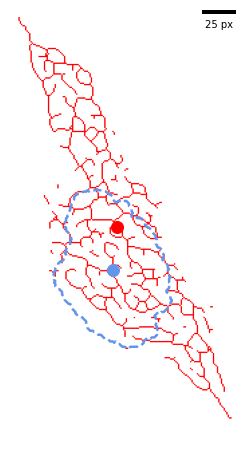

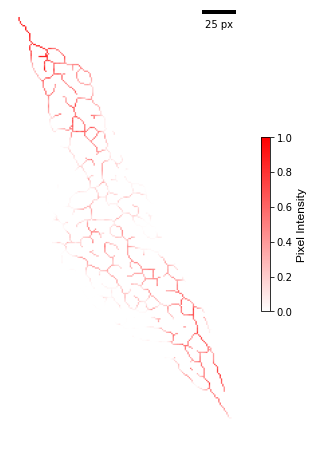

In [160]:
def intensity_plotter(ResultsRow,TextureDF,save):
    from matplotlib.colors import LinearSegmentedColormap
    
    # Color map
    colors = [(1, 1, 1), (1, 0, 0)] # first color is white, last is red
    cm     = LinearSegmentedColormap.from_list("Custom", colors, N=300)
    
    ##### FIGURE 1
    # Initialize figure 1
    fig,ax = plt.subplots(figsize=(8,8))
    ax.imshow(ResultsRow['Mask']*TextureDF['Skeleton'][ResultsRow['Img Index']],cmap=cm)
    ax.axis('off')
    
    # Plot Nucleus Centroid and Cytoskeleton Centroid
    #ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'.',color='#6495ED',markersize=5,zorder=8)
    #ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'o',color='#6495ED',markersize=15,zorder=8,fillstyle='none')
    ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'o',color='#6495ED',markersize=12,zorder=8)
    
    #ax.plot(ResultsRow['Cytoskeleton Centroid'][1],ResultsRow['Cytoskeleton Centroid'][0],'.',color='r',markersize=5,zorder=8)
    #ax.plot(ResultsRow['Cytoskeleton Centroid'][1],ResultsRow['Cytoskeleton Centroid'][0],'o',color='r',markersize=15,zorder=8,fillstyle='none',)
    ax.plot(ResultsRow['Cytoskeleton Centroid'][1],ResultsRow['Cytoskeleton Centroid'][0],'o',color='r',markersize=12,zorder=8)
    
    # Plot Nucleus Contour
    ax.plot(ResultsRow['Nucleus Contour'][:,0],ResultsRow['Nucleus Contour'][:,1],'--',color='#6495ED',zorder=11,linewidth=2.5)
    
    # Set x and y lims and title
    ax.set_ylim([min(ResultsRow['Patches'][4]),max(ResultsRow['Patches'][4])])
    ax.set_xlim([min(ResultsRow['Patches'][5]),max(ResultsRow['Patches'][5])])
    
    # Scale Bar
    scalebar = ScaleBar(1,"px",color='k',box_alpha=0,dimension='pixel-length') 
    ax.add_artist(scalebar)
    
    # Adjust and Show
    if save:
        plt.savefig(".//output1.png",format='png',transparent=True,bbox_inches='tight',dpi=300)
    fig.show()
    
    
    ##### FIGURE 2
    # Initialize figure 2
    fig,ax = plt.subplots(figsize=(8,8))
    intensity = DeconvDF['Image'][ResultsRow['Img Index']] / np.max(DeconvDF['Image'][ResultsRow['Img Index']])
    aux = intensity * ResultsRow['Mask']
    aux = aux / np.max(aux)
    ax.imshow(ResultsRow['Mask']*TextureDF['Skeleton'][ResultsRow['Img Index']]*aux,cmap=cm)

    ax.axis('off')
    
    # Plot Nucleus Centroid and Cytoskeleton Centroid
    #ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'.',color='#6495ED',markersize=5,zorder=8)
    #ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'o',color='#6495ED',markersize=15,zorder=8,fillstyle='none')
    #ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'o',color='#6495ED',markersize=12,zorder=8,alpha=0.5)
    
    #ax.plot(ResultsRow['Cytoskeleton Centroid'][1],ResultsRow['Cytoskeleton Centroid'][0],'.',color='r',markersize=5,zorder=8)
    #ax.plot(ResultsRow['Cytoskeleton Centroid'][1],ResultsRow['Cytoskeleton Centroid'][0],'o',color='r',markersize=15,zorder=8,fillstyle='none',)
    #ax.plot(ResultsRow['Cytoskeleton Centroid'][1],ResultsRow['Cytoskeleton Centroid'][0],'o',color='r',markersize=12,zorder=8,alpha=0.5)
    
    # Plot Nucleus Contour
    #ax.plot(ResultsRow['Nucleus Contour'][:,0],ResultsRow['Nucleus Contour'][:,1],'--',color='#6495ED',zorder=11,linewidth=2.5,alpha=0.5)
         
    # Set x and y lims and title
    ax.set_ylim([min(ResultsRow['Patches'][4]),max(ResultsRow['Patches'][4])])
    ax.set_xlim([min(ResultsRow['Patches'][5]),max(ResultsRow['Patches'][5])])
    #ax.set_title(feat,fontsize=12)
    
    # Colorbar
    cbar = fig.colorbar(pltc.ScalarMappable(norm=plt.Normalize(0, 1), cmap=cm), ax=ax, shrink = 0.4)
    cbar.set_label('Pixel Intensity',fontfamily='arial',fontsize=12)
    #cbar.set_ticks(np.linspace(0,90,10,endpoint=True))
    
    # Scale Bar
    scalebar = ScaleBar(1,"px",color='k',box_alpha=0,dimension='pixel-length') 
    ax.add_artist(scalebar)
    
    # Adjust and Show
    if save:
        plt.savefig(".//output.png",format='png',transparent=True,bbox_inches='tight',dpi=300)
    fig.show()
    
    return print('Done.')
    
intensity_plotter(ResultsRow=ResultsDF.loc[0],TextureDF=TextureDF,save=True)

# <font color='red'> Line Plotter</font>

In [34]:
%matplotlib inline
def line_plotter(ResultsRow,TextureDF,feat,cmap,normalize_bounds,colorbar_label,overlay_sk,save):
    fig,ax = plt.subplots(figsize=(8,8))
    
    # Plot background
    if overlay_sk == False:
        ax.imshow(np.zeros((1040, 1388)),cmap='gray',alpha=0) 
    else:
        ax.imshow(1-ResultsRow['Mask']*TextureDF['Skeleton'][ResultsRow['Img Index']],cmap='gray')
    ax.axis('off')
    
    # Get bounds for color map
    if normalize_bounds == 'default':
        normalize_bounds = [0,np.max(ResultsRow[feat])]

    # Plot Nucleus Centroid and Cytoskeleton Centroid
    #ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'.',color='#6495ED',markersize=5,zorder=8)
    #ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'o',color='#6495ED',markersize=15,zorder=8,fillstyle='none')
    ax.plot(ResultsRow['Nucleus Centroid'][1],ResultsRow['Nucleus Centroid'][0],'o',color='#6495ED',markersize=12,zorder=8)
    
    #ax.plot(ResultsRow['Cytoskeleton Centroid'][1],ResultsRow['Cytoskeleton Centroid'][0],'.',color='r',markersize=5,zorder=8)
    #ax.plot(ResultsRow['Cytoskeleton Centroid'][1],ResultsRow['Cytoskeleton Centroid'][0],'o',color='r',markersize=15,zorder=8,fillstyle='none',)
    ax.plot(ResultsRow['Cytoskeleton Centroid'][1],ResultsRow['Cytoskeleton Centroid'][0],'o',color='r',markersize=12,zorder=8)
    
    # Plot Nucleus Contour
    ax.plot(ResultsRow['Nucleus Contour'][:,0],ResultsRow['Nucleus Contour'][:,1],'--',color='#6495ED',zorder=11,linewidth=2.5)
                
    # Plot segments colored by feature value
    for l in range(len(ResultsRow['Lines'])):
            # Get line = [p0,p1]. 
            p0, p1 = ResultsRow['Lines'][l]
            colour   = cmap(plt.Normalize(normalize_bounds[0], normalize_bounds[1])(ResultsRow[feat][l]))
            ax.plot((p0[0], p1[0]), (p0[1], p1[1]),linewidth=2,color=colour,alpha=1)

    # Set x and y lims and title
    ax.set_ylim([min(ResultsRow['Patches'][4]),max(ResultsRow['Patches'][4])])
    ax.set_xlim([min(ResultsRow['Patches'][5]),max(ResultsRow['Patches'][5])])
    ax.set_title(feat,fontsize=12)
    
    # Colorbar
    cbar = fig.colorbar(pltc.ScalarMappable(norm=plt.Normalize(normalize_bounds[0], normalize_bounds[1]), cmap=cmap), ax=ax, shrink = 0.4)
    cbar.set_label(colorbar_label,fontfamily='arial',fontsize=12)
    #cbar.set_ticks(np.linspace(0,90,10,endpoint=True))
    
    # Scale Bar
    scalebar = ScaleBar(1,"px",color='k',box_alpha=0,dimension='pixel-length') 
    ax.add_artist(scalebar)
    
    # Adjust and Show
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save:
        plt.savefig(".//output.png",format='png',transparent=True,bbox_inches='tight',dpi=300)
    fig.show()
    
    return print('Done.')

# Color map
# colors = [(0.5, 0.5, 0.5), (1, 0, 0)] # first color is black, last is red
# cm     = LinearSegmentedColormap.from_list("Custom", colors, N=300)

cmap     = pltc.rainbow
cm       = truncate_colormap(cmap, 0, 1, 300)


line_plotter(ResultsRow=ResultsDF.loc[2],TextureDF=TextureDF,feat='LSF2D:Distances to Centroid',cmap=cm,normalize_bounds='default',colorbar_label='Degrees',overlay_sk=True,save=False)

NameError: name 'ResultsDF' is not defined

# <font color='red'> Graph Plotter</font>

ipykernel_launcher.py (100): Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


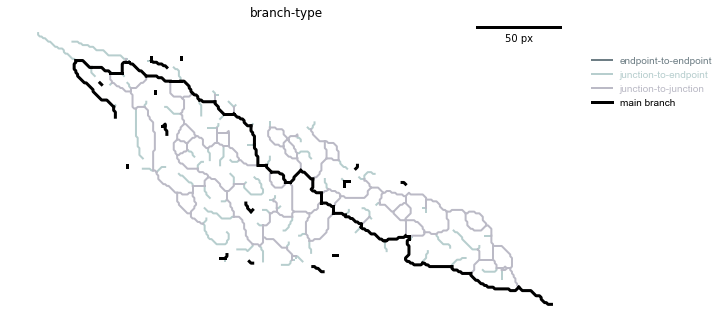

In [214]:
def graph_plotter(ResultsRow,cmap,feat,normalize_bounds,colorbar_label,nodes,main_branch,save):
    # Get skeleton
    img       = DeconvDF['Image'][ResultsRow['Img Index']] / np.max(DeconvDF['Image'][ResultsRow['Img Index']])
    intensity = ResultsRow['Mask'] * img
    ske       = Skeleton((ResultsRow['Mask']*TextureDF['Skeleton'][ResultsRow['Img Index']]*(intensity/np.max(intensity))).astype(float)) 
    
    # Initialize figure
    fig,ax = plt.subplots(figsize=(10,10))
    ax.imshow(np.zeros_like(ResultsRow['Mask']*TextureDF['Skeleton'][ResultsRow['Img Index']]),cmap='gray',alpha=0)
    ax.axis('off')
    
    # Get feat
    if feat == 'branch-distance':
        feat_list = ske.path_lengths()
    if feat == 'mean-pixel-value':
        feat_list = ske.path_means()
    if feat == 'stdev-pixel-value':
        feat_list = ske.path_stdev()
    if feat == 'euclidean-distance':
        feat_list = summarize(ske,find_main_branch=False)['euclidean-distance']
    if feat == 'tortuosity':
        feat_list = summarize(ske,find_main_branch=False)['euclidean-distance'] / ske.path_lengths()
    if feat == 'branch-type':
        feat_list = summarize(ske,find_main_branch=False)
    if feat == None:
        feat_list = np.ones((1,ske.n_paths))
    
    # Get bounds for color map
    if normalize_bounds == 'default':
        normalize_bounds = [0,np.max(feat_list)]
    
    # Plot paths
    if feat != 'branch-type': # Draw all segments 1 by 1
        for e in range(ske.n_paths):
            if feat != None:
                colour   = cmap(plt.Normalize(normalize_bounds[0], normalize_bounds[1])(feat_list[e]))
                ax.plot(ske.path_coordinates(e)[:,0],ske.path_coordinates(e)[:,1],linewidth=2,color=colour,alpha=1)     
            else:
                ax.plot(ske.path_coordinates(e)[:,0],ske.path_coordinates(e)[:,1],linewidth=2,color='r',alpha=1)
    
    # Branch type
    if feat == 'branch-type': # Filter by branch-type
        btypes = ['endpoint-to-endpoint','junction-to-endpoint','junction-to-junction','isolated cycle']
        colors = ['#6E7E85','#B7CECE','#BBBAC6','#744253']
    
        for b in range(3):
            data = feat_list[feat_list['branch-type'] == b]

            flag = True
            for ind in data.index:
                if flag:
                    ax.plot(ske.path_coordinates(ind)[:,0],ske.path_coordinates(ind)[:,1],linewidth=2,color=colors[b],label=btypes[b])
                    flag = False
                else:
                    ax.plot(ske.path_coordinates(ind)[:,0],ske.path_coordinates(ind)[:,1],linewidth=2,color=colors[b])
                
        leg = ax.legend(framealpha=0,loc=(1.04,0.7),labelcolor='linecolor')
        plt.setp(leg.texts, family='arial')
    
    if main_branch:
        fb    = summarize(ske,find_main_branch=True)
        datab = fb[fb['main'] == True]
        flag = True
        for indb in datab.index:
            if flag:
                    ax.plot(ske.path_coordinates(indb)[:,0],ske.path_coordinates(indb)[:,1],linewidth=3,color='k',label='main branch')
                    flag = False
            else:
                ax.plot(ske.path_coordinates(indb)[:,0],ske.path_coordinates(indb)[:,1],linewidth=3,color='k')
        
        leg = ax.legend(framealpha=0,loc=(1.04,0.7),labelcolor='linecolor')
        plt.setp(leg.texts, family='arial')
    
        
    # Plot nodes
    if nodes:
        for e in range(ske.n_paths):
            ax.plot(ske.path_coordinates(e)[0][0],ske.path_coordinates(e)[0][1],'o',markersize=1,color='k')
            ax.plot(ske.path_coordinates(e)[-1][0],ske.path_coordinates(e)[-1][1],'o',markersize=1,color='k')

    
    # Set x and y lims and title
    ax.set_ylim([min(ResultsRow['Patches'][5]),max(ResultsRow['Patches'][5])])
    ax.set_xlim([min(ResultsRow['Patches'][4]),max(ResultsRow['Patches'][4])])
    ax.set_title(feat,fontsize=12)
    
    # Colorbar
    if feat != None and feat !='branch-type':
        cbar = fig.colorbar(pltc.ScalarMappable(norm=plt.Normalize(normalize_bounds[0], normalize_bounds[1]), cmap=cmap), ax=ax, shrink = 0.4)
        cbar.set_label(colorbar_label,fontfamily='arial',fontsize=12)
        #cbar.set_ticks(np.linspace(0,90,10,endpoint=True))

    # Scale Bar
    scalebar = ScaleBar(1,"px",color='k',box_alpha=0,dimension='pixel-length') 
    ax.add_artist(scalebar)
    
    # save and show
    if save:
        plt.savefig(".//output.png",format='png',transparent=True,bbox_inches='tight',dpi=300)
    fig.show()
    
    

cmap     = pltc.rainbow
cm       = truncate_colormap(cmap, 0, 1, 300)

data = graph_plotter(ResultsRow=ResultsDF.loc[0],feat='branch-type',cmap=cm,normalize_bounds='default',colorbar_label='Pixels',nodes=False,main_branch=True, save=True)
#line_plotter(ResultsRow=ResultsDF.loc[2],TextureDF=TextureDF,feat='LSF2D:Distances to Centroid',cmap=cm,normalize_bounds='default',colorbar_label='Degrees',overlay_sk=True,save=False)



In [188]:
data

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
6,2,83,87,1.414214,0,0.483566,0.044747,665.0,1184.0,666.0,1183.0,665.0,1184.0,666.0,1183.0,1.414214
18,3,155,156,1.000000,0,0.001541,0.000687,681.0,1135.0,681.0,1136.0,681.0,1135.0,681.0,1136.0,1.000000
35,5,291,292,1.000000,0,0.354421,0.017166,697.0,1178.0,697.0,1179.0,697.0,1178.0,697.0,1179.0,1.000000
57,8,418,419,1.000000,0,0.003601,0.001068,712.0,1198.0,712.0,1199.0,712.0,1198.0,712.0,1199.0,1.000000
120,11,850,870,2.414214,0,0.001882,0.000477,752.0,1080.0,754.0,1079.0,752.0,1080.0,754.0,1079.0,2.236068
184,12,1234,1292,7.242641,0,0.003575,0.001871,789.0,1077.0,795.0,1074.0,789.0,1077.0,795.0,1074.0,6.708204
195,13,1345,1361,2.000000,0,0.015676,0.001339,801.0,1084.0,803.0,1084.0,801.0,1084.0,803.0,1084.0,2.000000
207,15,1419,1424,2.414214,0,0.033570,0.019363,814.0,1134.0,815.0,1136.0,814.0,1134.0,815.0,1136.0,2.236068
225,16,1546,1570,2.414214,0,0.095104,0.018132,841.0,1126.0,843.0,1125.0,841.0,1126.0,843.0,1125.0,2.236068


In [187]:
data.index

Int64Index([6, 18, 35, 57, 120, 184, 195, 207, 225], dtype='int64')

In [200]:
list(ske.path_coordinates(data.index[5])[:,0]) + list(ske.path_coordinates(data.index[1])[:,0])

[789.0, 790.0, 791.0, 792.0, 793.0, 794.0, 795.0, 681.0, 681.0]

In [207]:
summarize(ske,find_main_branch=True)

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance,main
0,1,2,34,29.798990,1,0.386097,0.137560,629.0,1213.0,651.0,1197.0,629.0,1213.0,651.0,1197.0,27.202941,False
1,1,24,154,35.142136,1,0.520057,0.148744,649.0,1208.0,680.0,1198.0,649.0,1208.0,680.0,1198.0,32.572995,False
2,1,34,117,39.284271,2,0.213194,0.119475,651.0,1197.0,673.0,1170.0,651.0,1197.0,673.0,1170.0,34.828150,True
3,1,34,65,10.656854,2,0.543041,0.102865,651.0,1197.0,660.0,1193.0,651.0,1197.0,660.0,1193.0,9.848858,True
4,1,65,73,5.828427,1,0.284738,0.079739,660.0,1193.0,662.0,1188.0,660.0,1193.0,662.0,1188.0,5.385165,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1,1891,1903,3.414214,2,0.780529,0.018883,899.0,1075.0,902.0,1076.0,899.0,1075.0,902.0,1076.0,3.162278,False
268,1,1892,1903,3.828427,2,0.709110,0.060985,899.0,1076.0,902.0,1076.0,899.0,1076.0,902.0,1076.0,3.000000,False
269,1,1903,1910,2.000000,2,0.683263,0.073459,902.0,1076.0,904.0,1076.0,902.0,1076.0,904.0,1076.0,2.000000,False
270,1,1910,1932,13.071068,2,0.770492,0.072006,904.0,1076.0,909.0,1065.0,904.0,1076.0,909.0,1065.0,12.083046,False


In [52]:
ske.path(270)

array([1912, 1911, 1917, 1916, 1926, 1925, 1930, 1929, 1928, 1933, 1932,
       1934])

In [62]:
ske.path_coordinates(270)[:,0]

array([904., 904., 905., 905., 906., 906., 907., 907., 907., 908., 908.,
       909.])

In [56]:
ske.paths[270]

<1x2238 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

# <font color='red'> Write ResultsDF to pickle</font>

In [6]:
#ResultsDF['Cell desc.'] = pd.Series([])
#ResultsDF.to_excel(os.getcwd() + '\\ResultsSubsetSofia.xlsx',na_rep='NaN')  


ResultsDF.to_pickle(".//ResultsSubsetSofia.pkl")  #<------
#unpickled_df = pd.read_pickle(".//res19maio.pkl")  

print('Save 🥒')

Save 🥒


---